# Medical Data Visualizer

#### The third project of the "[*Data Analysis with Python*](https://www.freecodecamp.org/learn/data-analysis-with-python/)" Certification.

#### A [freeCodeCamp.org](https://www.freecodecamp.org/) course

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### The Goal

Our purpose in this project is to visualize and make calculations from medical examination data using Matplotlib, Seaborn, and Pandas. The dataset values were collected during medical examinations.

### Hands on!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv')

### Basic exploration

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.shape

(70000, 13)

### Draw a Categorical Plot

We notice that we have several binary variables. Our first task gonna be to create a chart where we show the counts of good and bad outcomes for several discrete variables for patients with `cardio = 0` and `cardio = 1` in different panels.

The variables which we can work with are `cholesterol`, `gluc`, `alco`, `active`, and `smoke`. However, we have to keep in mind the variables `cholesterol` and `gluc` are not binary:

In [6]:
df['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [7]:
df['gluc'].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

Thus, we normalize the data by making `0` always good and `1` always bad:

* If the value of `cholesterol` or `gluc` is `1`, we make the value `0`.
* If the value is more than `1`, we make the value `1`.

In [8]:
def normalize(value):
    if(value > 1):
        return 1
    else:
        return 0

df['cholesterol'] = df['cholesterol'].apply(normalize)

df['gluc'] = df['gluc'].apply(normalize)

Furthermore, we are going to add another variable that determines whether or not a patient is overweight.

To determine if a person is overweight, first we calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is greater than 25 then we consider the person is overweight. We gonna use the value `0` for NOT overweight and the value `1` for overweight.

In [9]:
df['overweight'] = df['weight'] /((df['height']/100)**2)
   
df['overweight'] = df['overweight'].apply(lambda x: 1 if x > 25 else 0)

In [10]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


Now we gonna convert the data into long format in order to create the chart that shows the value counts of the categorical features. We'll use Seaborn's `catplot`. The dataset should be split by `cardio` so there is one chart for each cardio value.

In [11]:
df_cat = df[['cardio','active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']]
    
df_cat = pd.melt(df_cat, id_vars=['cardio'], var_name='variable', value_name='value')

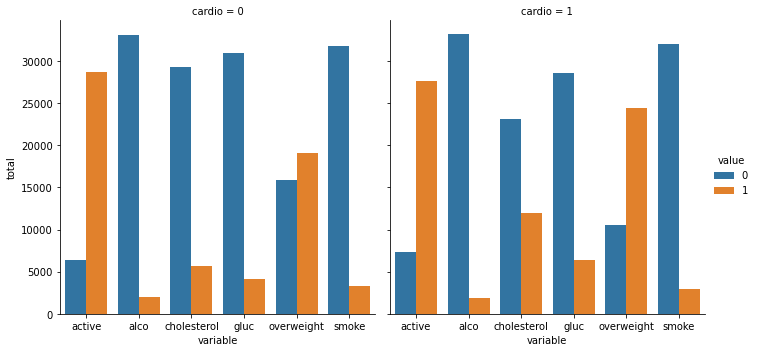

In [12]:
fig = sns.catplot(x="variable", hue="value", col="cardio", data=df_cat, kind='count')

fig.set_axis_labels("variable", "total")

plt.show()

### Draw a Heatmap

Our next goal is to create a correlation matrix using the dataset. But first, we gonna clean some data following these criteria:

* The systolic pressure has to be higher than diastolic.
* The patient's height can neither be less than the 2.5th percentile nor more than the 97.5th percentile.
* The same for the weight, it can neither be less than the 2.5th percentile nor more than the 97.5th percentile.

Let's define our new dataset:

In [13]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
            (df['height'] >= df['height'].quantile(0.025)) &
            (df['height'] <= df['height'].quantile(0.975)) &
            (df['weight'] >= df['weight'].quantile(0.025)) &
            (df['weight'] <= df['weight'].quantile(0.975))
            ]

We calculate the correlation matrix:

In [14]:
corr = df_heat.corr()

We gonna leave the cells above the diagonal blank. To do this we first need to create a mask.

In [15]:
mask = np.triu(np.ones_like(corr, dtype=bool))

Finally, we set up the Matplotlib figure and we draw the heatmap with `sns.heatmap`.

<AxesSubplot:>

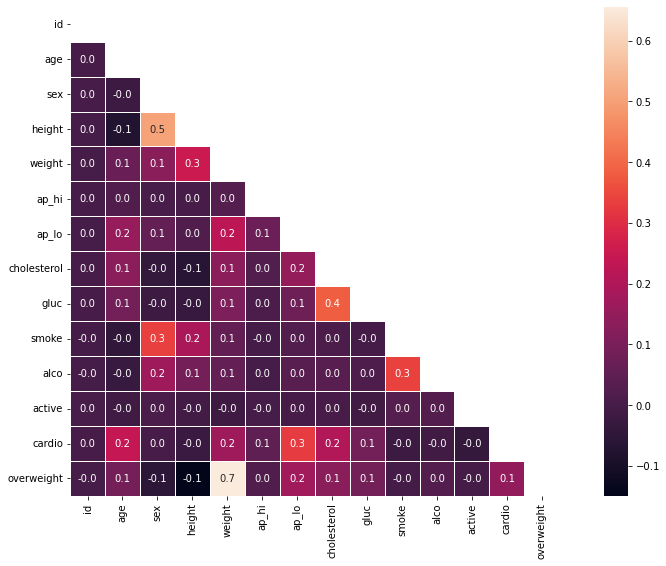

In [16]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.heatmap(corr, mask=mask, square=True, linewidths=0.5, annot=True, fmt="0.1f")

### Appendix

Now, we can submit the project using the following functions:

In [17]:
def draw_cat_plot():

    df_cat = df[['cardio','active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']]

    df_cat = pd.melt(df_cat, id_vars=['cardio'], var_name='variable', value_name='value')
    
    fig = sns.catplot(x="variable", hue="value", col="cardio", data=df_cat, kind='count')
    fig.set_axis_labels("variable", "total")
    fig = fig.fig

    fig.savefig('catplot.png')
    return fig


def draw_heat_map():
    
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
            (df['height'] >= df['height'].quantile(0.025)) &
            (df['height'] <= df['height'].quantile(0.975)) &
            (df['weight'] >= df['weight'].quantile(0.025)) &
            (df['weight'] <= df['weight'].quantile(0.975))
            ]

    corr = df_heat.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig, ax = plt.subplots(figsize=(16, 9))

    sns.heatmap(corr, mask=mask, square=True, linewidths=0.5, annot=True, fmt="0.1f")

    fig.savefig('heatmap.png')
    return fig
